<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path='/content/drive/MyDrive/Machine Learning Class/Module Learning Notebooks/Projects/Introduction to Neural Networks/Churn.csv'
ds = pd.read_csv(file_path)

## Data Overview

### View the first and last 5 rows of the dataset.

In [6]:
# let's view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# let's view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Observations

- The first 3 columns contain data that is unique to each line of data.  This type of data is not usefull to machine learning models and needs to be removed.

### Checking for Missing Values

In [8]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for unique values for each of the column

In [9]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Understand the shape of the dataset

In [11]:
ds.shape

(10000, 11)

### Check the data types of the columns for the dataset

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### Observations

- There is a large difference in the different deviations of the data.  Due to this normalizing the data will give better results before feeding it into our model.

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

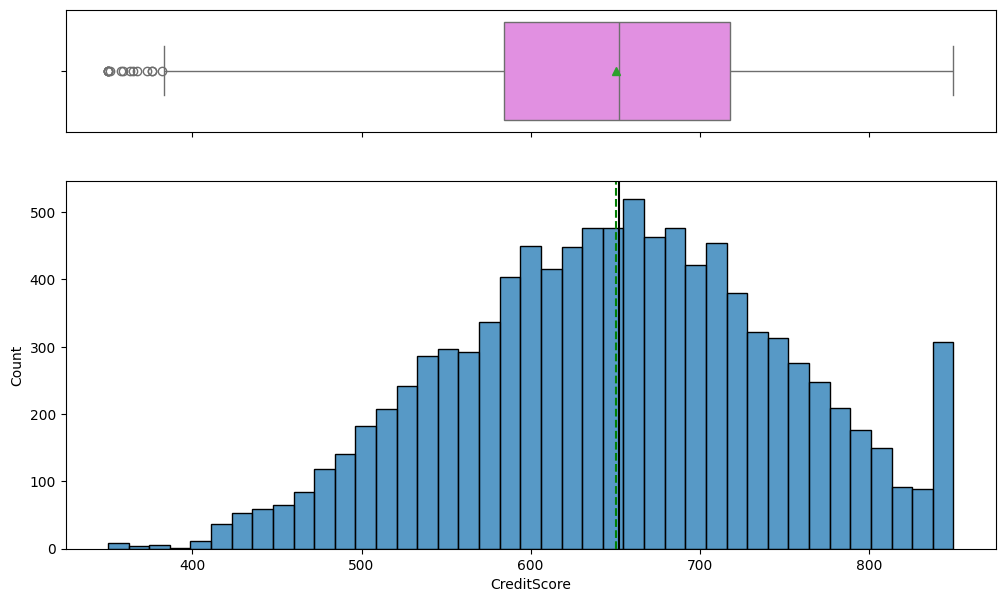

In [16]:
histogram_boxplot(ds,'CreditScore')

#### Observations

- The data looks very normal but seems to have a lot of perfect credit scores.  This is likely due to all the outliers being summed into one value.

#### Observations on Age

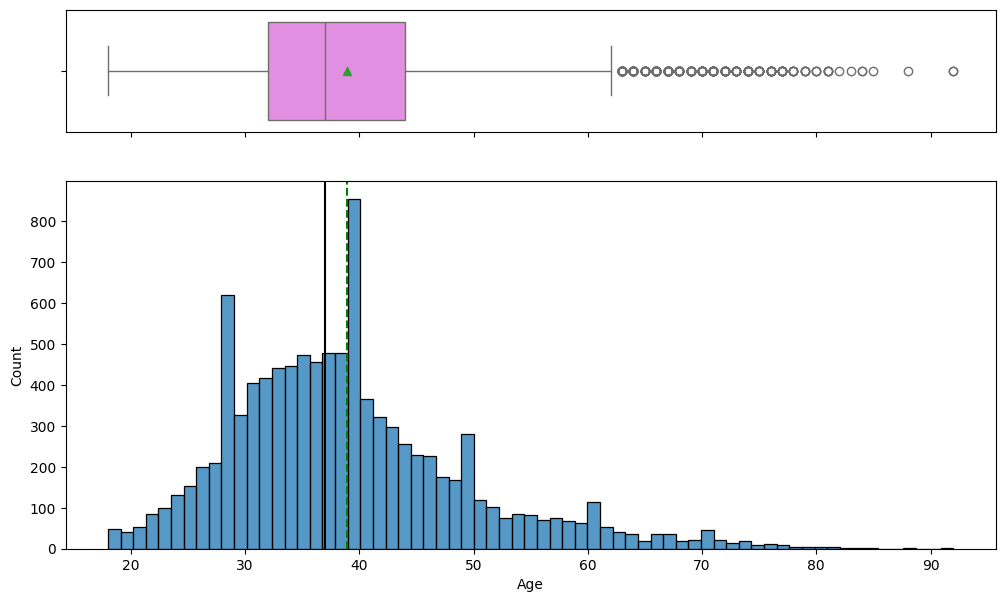

In [17]:
histogram_boxplot(ds,'Age')

#### Observations

- The data seems to have a very even distribution aside from a few age groups having a bit of an over representation.  

#### Observations on Balance

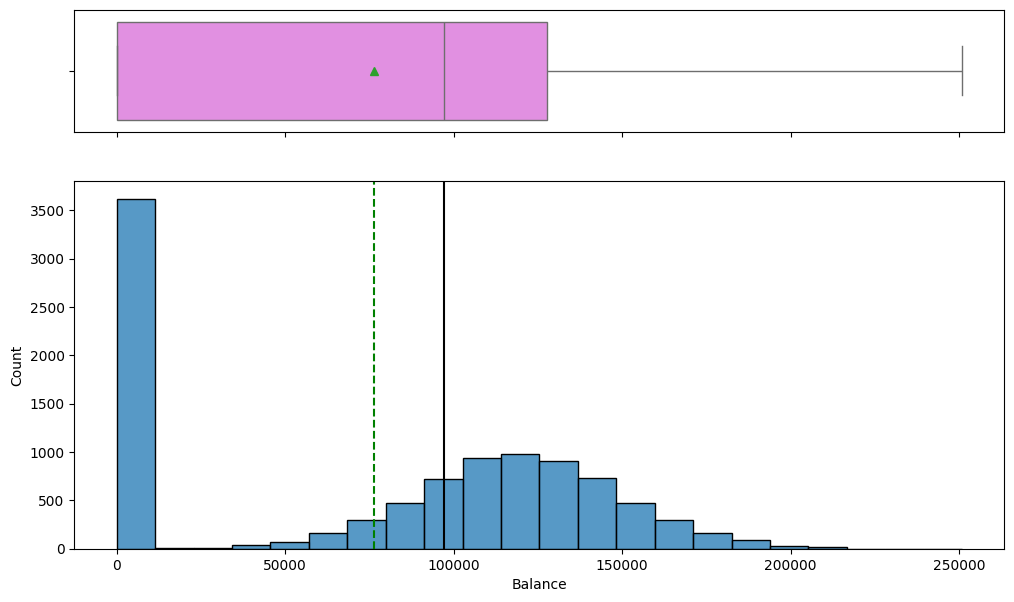

In [18]:
histogram_boxplot(ds,'Balance')

#### Observations

- The distribution is very normal aside from a large amount of people with zero balances in their accounts.  This might be people with two types of behavior.

#### Observations on Estimated Salary

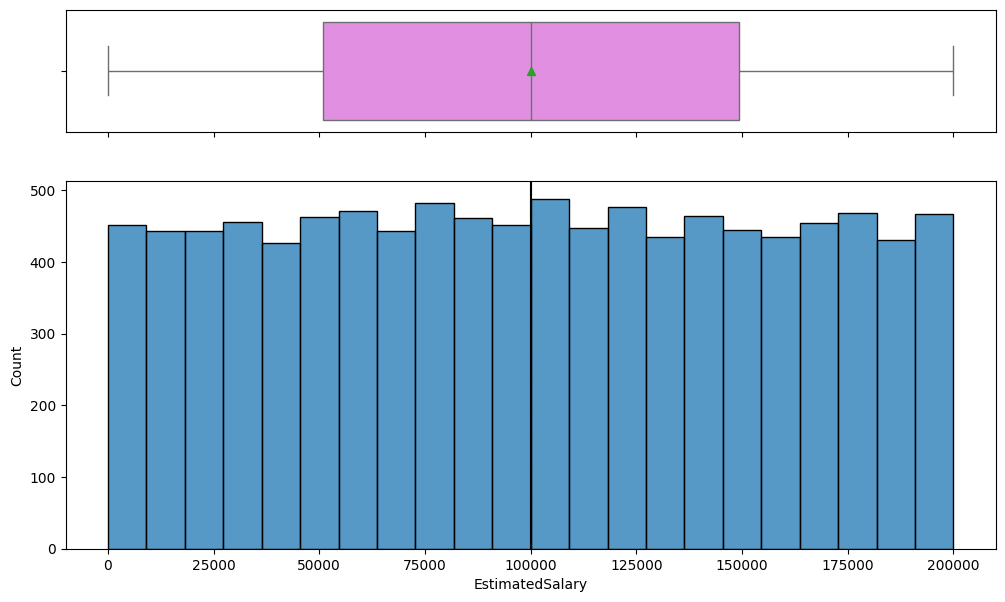

In [19]:
histogram_boxplot(ds,'EstimatedSalary')

#### Observations

- Salary has a very balanced representation of people at every level.  Distribution is not a normal distribution.

#### Observations on Exited

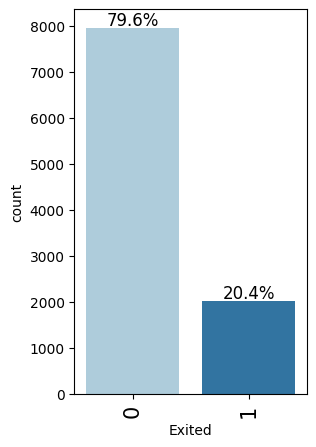

In [20]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations

- The amount of people who have exited are only about 20% of the customer base.

#### Observations on Geography

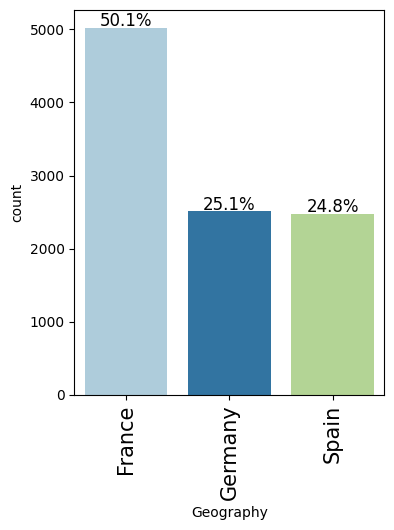

In [21]:
labeled_barplot(ds, "Geography", perc=True)

#### Observations

- The majority of customers are from France.

#### Observations on Gender

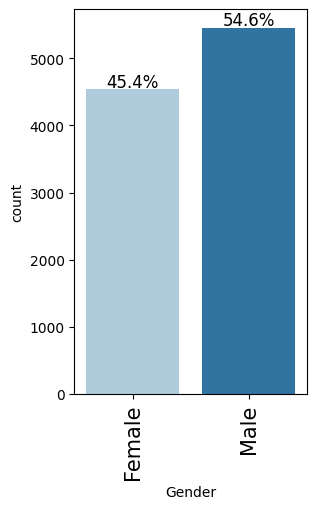

In [22]:
labeled_barplot(ds, "Gender", perc=True)

#### Observations

- A slight majority of the customers are male.

#### Observations on Tenure

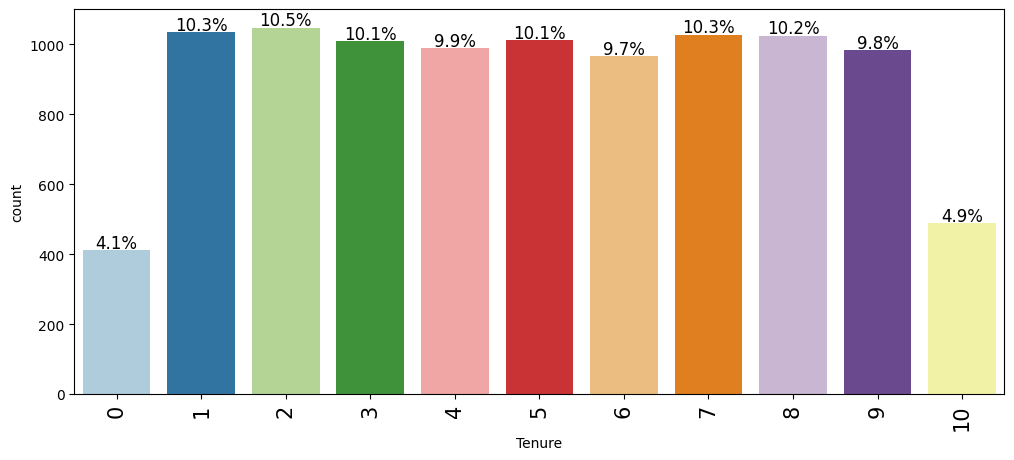

In [23]:
labeled_barplot(ds, "Tenure", perc=True)

#### Observations

- The tenure of customers is fairly evenly distributed with a lower representation of 10 years and 0 years.

#### Observations on Number of Products

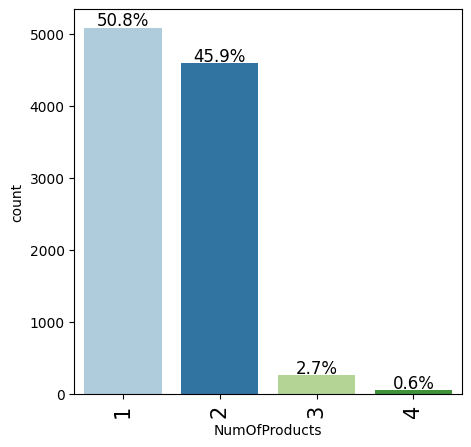

In [24]:
labeled_barplot(ds, "NumOfProducts", perc=True)

#### Observations

- The vast majority of customers only have 1 product or 2 products.  Very few have 3 and 4 products.

#### Observations on Has Credit Card

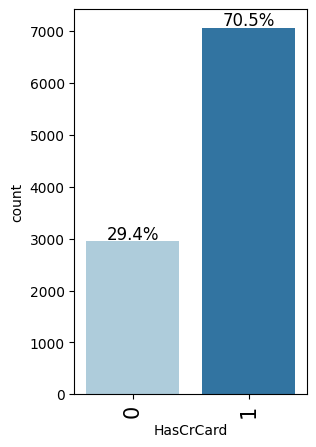

In [25]:
labeled_barplot(ds, "HasCrCard", perc=True)

#### Observations

- 70% of customers have a credit card as a product.

#### Observations on Is Active Member

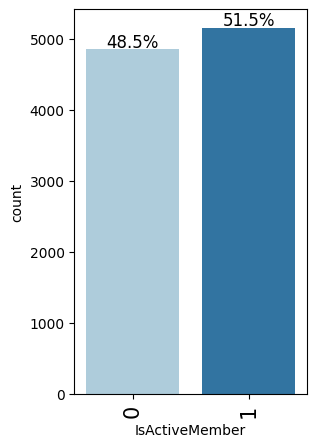

In [26]:
labeled_barplot(ds, "IsActiveMember", perc=True)

#### Observations

- Just under 50% of customers are inactive

### Bivariate Analysis

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

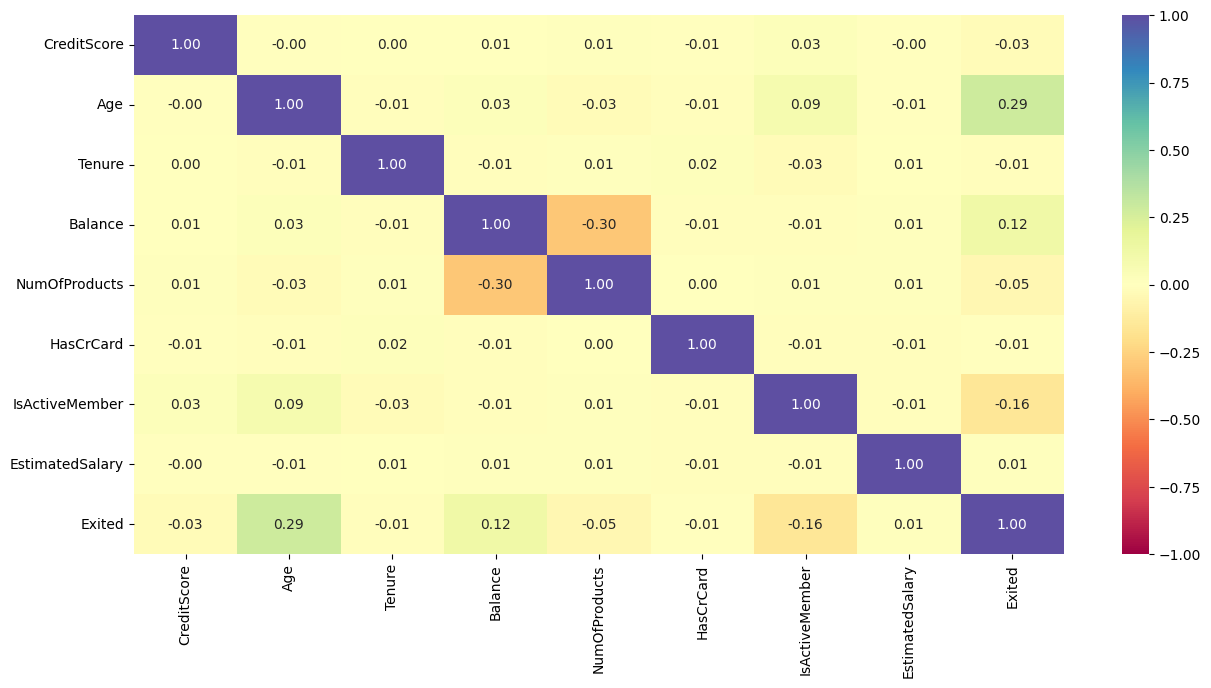

In [28]:
# Select only numerical columns from the dataset
numerical_ds = ds.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 7))
sns.heatmap(numerical_ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#### Observations

- Age has a .29 rate of correlation with Exited
- Balance has a .12 rate of correlation with Exited
- Is Active Member has a -.16 rate of correlation with Exited
-Number of Products has a -.30 rate of correlation with Balance

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


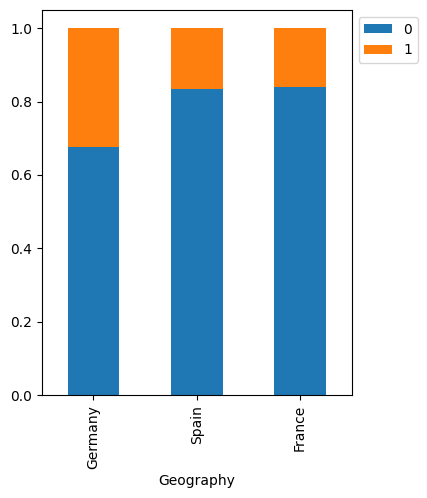

In [29]:
stacked_barplot(ds, "Geography", "Exited" )

#### Observations

- Those from Germany have a much higher rate of Exiting than other countries

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


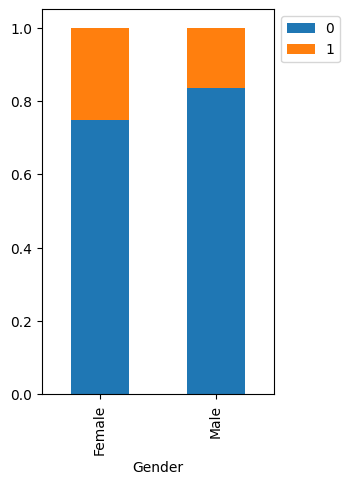

In [30]:
stacked_barplot(ds, "Gender", "Exited" )

#### Observations

- Females have a much higher rate of Exiting that Males

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


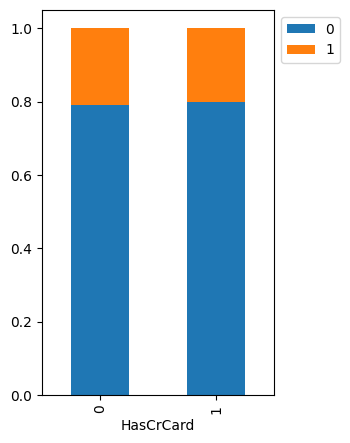

In [31]:
stacked_barplot(ds, "HasCrCard", "Exited" )

#### Observations

- Having a credit card has very little correlation with Exiting

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


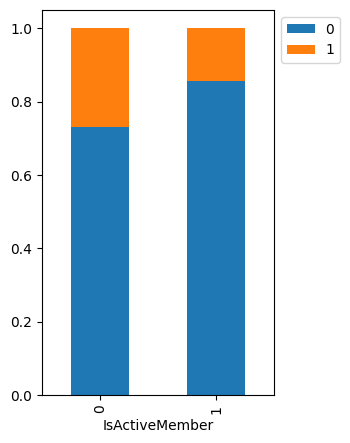

In [32]:
stacked_barplot(ds, "IsActiveMember", "Exited" )

#### Observations

- A member being Inactive has some impact on whether or not they will Exit.

#### Exited Vs Credit Score

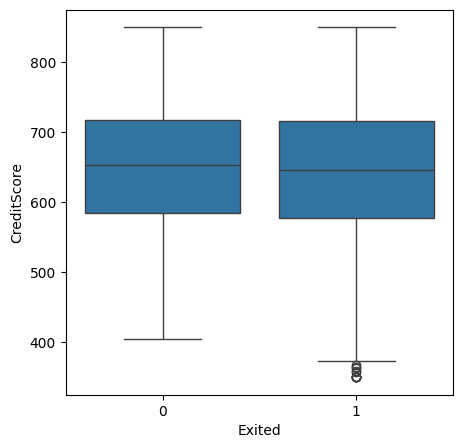

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Observations

- Credit score has little impact on a customer exiting

#### Exited Vs Age

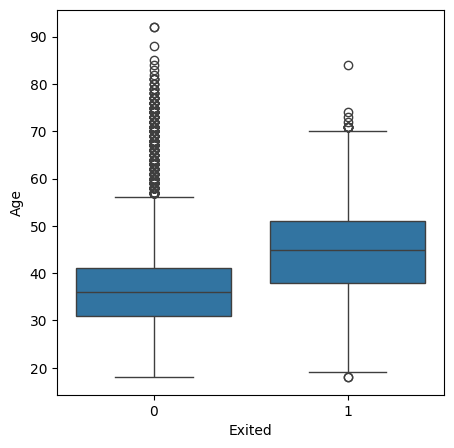

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

#### Observations

- An older age has a correlation with Exiting.

#### Exited Vs Tenure

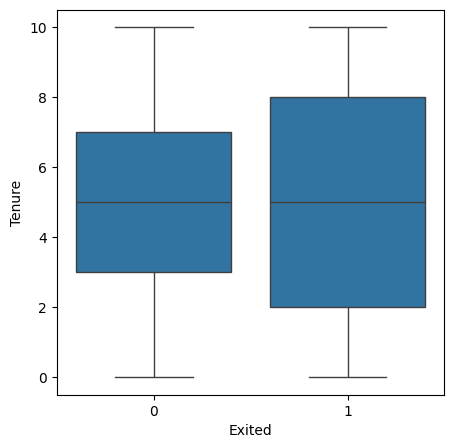

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

#### Observations

- Tenure has very little impact on exiting but has a larger standard deviation.

#### Exited Vs Balance

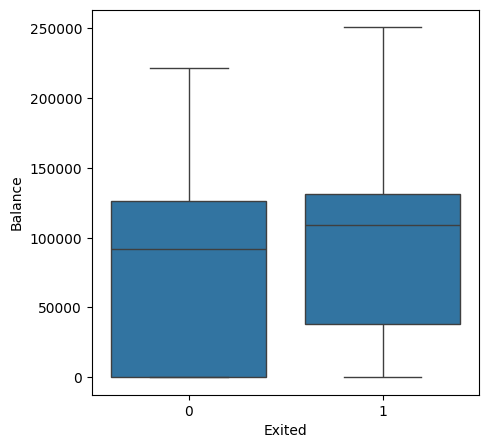

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

#### Observations

- People who have a balance have a much higher chance of Exiting.  The mean does have little overall impact.

#### Exited Vs Number of Products

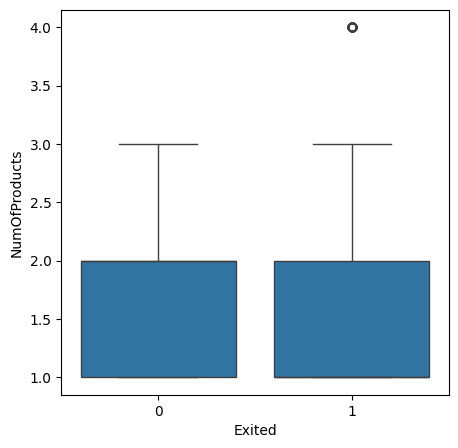

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

#### Observations

- Number of Products has little impact on whether or not a customer will leave the company.

#### Exited Vs Estimated Salary

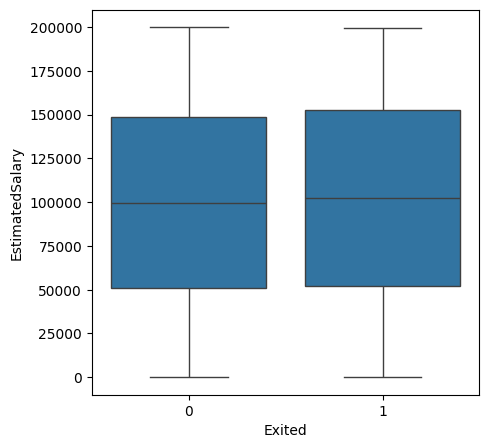

In [38]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

#### Observations

- Their is little impact from salary on whether or not a customer will exit.

## Data Preprocessing

### Train-validation-test Split

In [39]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.1,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.3,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [40]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6300, 10) (2700, 10) (1000, 10)
(6300,) (2700,) (1000,)


### Dummy Variable Creation

In [41]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True,dtype=int)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True,dtype=int)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True,dtype=int)     ## Complete the code to encode Geography and Gender in validation se

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6300 entries, 7648 to 2725
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        6300 non-null   int64  
 1   Age                6300 non-null   int64  
 2   Tenure             6300 non-null   int64  
 3   Balance            6300 non-null   float64
 4   NumOfProducts      6300 non-null   int64  
 5   HasCrCard          6300 non-null   int64  
 6   IsActiveMember     6300 non-null   int64  
 7   EstimatedSalary    6300 non-null   float64
 8   Geography_Germany  6300 non-null   int64  
 9   Geography_Spain    6300 non-null   int64  
 10  Gender_Male        6300 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 590.6 KB


### Data Normalization

In [43]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])    ## Complete the code to specify the columns to normalize
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Recall would be the best metric for this problem.  This is because False Negatives are costly.  Meaning not correctly predicting that a customer will leave as this will result in lost income for the company.


In [44]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [45]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [46]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [47]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [48]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
metric = keras.metrics.Recall()

# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [49]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100,    ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
197/197 [==============================] - 4s 6ms/step - loss: 0.6139 - recall: 0.0725 - val_loss: 0.5830 - val_recall: 0.0055
Epoch 2/100
197/197 [==============================] - 1s 5ms/step - loss: 0.5607 - recall: 0.0023 - val_loss: 0.5449 - val_recall: 0.0000e+00
Epoch 3/100
197/197 [==============================] - 1s 4ms/step - loss: 0.5324 - recall: 0.0000e+00 - val_loss: 0.5239 - val_recall: 0.0000e+00
Epoch 4/100
197/197 [==============================] - 1s 5ms/step - loss: 0.5162 - recall: 0.0000e+00 - val_loss: 0.5111 - val_recall: 0.0000e+00
Epoch 5/100
197/197 [==============================] - 1s 6ms/step - loss: 0.5063 - recall: 0.0000e+00 - val_loss: 0.5028 - val_recall: 0.0000e+00
Epoch 6/100
197/197 [==============================] - 1s 6ms/step - loss: 0.4995 - recall: 0.0000e+00 - val_loss: 0.4967 - val_recall: 0.0000e+00
Epoch 7/100
197/197 [==============================] - 1s 6ms/step - loss: 0.4945 - recall: 0.0000e+00 - val_loss: 0.4919 - val_re

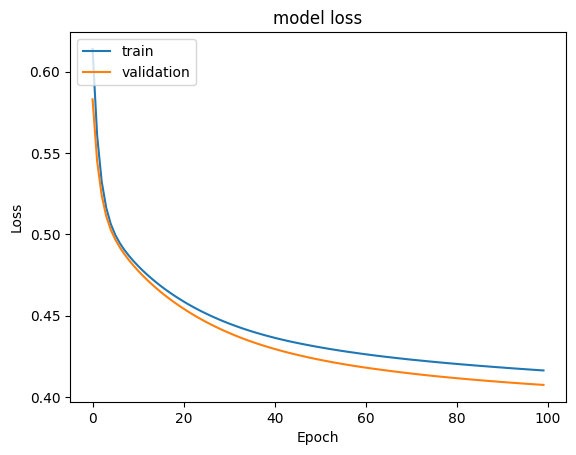

In [51]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

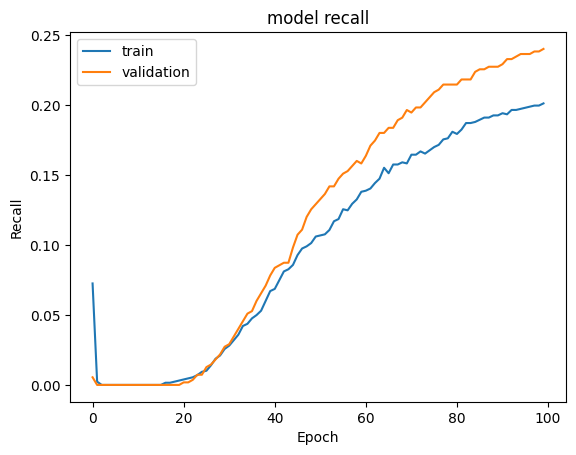

In [52]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [54]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [55]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [56]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5017
           1       0.65      0.20      0.31      1283

    accuracy                           0.82      6300
   macro avg       0.74      0.59      0.60      6300
weighted avg       0.79      0.82      0.77      6300



In [57]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2150
           1       0.71      0.24      0.36       550

    accuracy                           0.82      2700
   macro avg       0.77      0.61      0.63      2700
weighted avg       0.81      0.82      0.79      2700



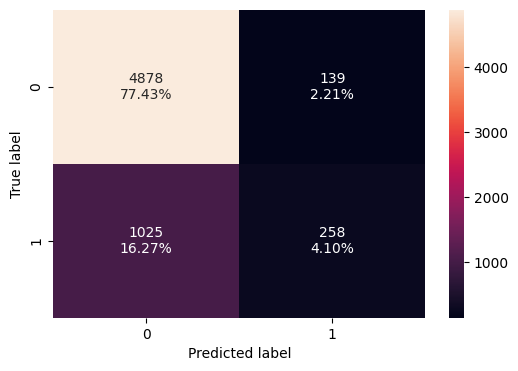

In [58]:
make_confusion_matrix(y_train, y_train_pred)

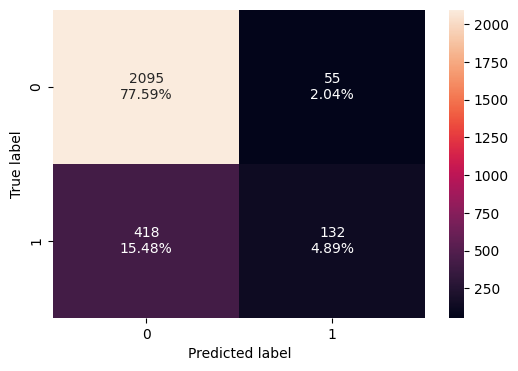

In [59]:
make_confusion_matrix(y_val, y_val_pred)

#### Observations

- The performance of model_0 is very poor it's only identifying 127 of the people that are exiting out of 423 people.  This is a recall of .23 and the model is still not leveling out after 100 Epochs.  This means not only is the performance poor it's using a lot of resources.  This may be due to getting stuck on a few local minima.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [60]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [61]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [62]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [63]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [64]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=40, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/40
197/197 [==============================] - 2s 6ms/step - loss: 0.4534 - recall: 0.0889 - val_loss: 0.4092 - val_recall: 0.2691
Epoch 2/40
197/197 [==============================] - 1s 5ms/step - loss: 0.4170 - recall: 0.2447 - val_loss: 0.3970 - val_recall: 0.3055
Epoch 3/40
197/197 [==============================] - 1s 6ms/step - loss: 0.4041 - recall: 0.3087 - val_loss: 0.3884 - val_recall: 0.2818
Epoch 4/40
197/197 [==============================] - 1s 6ms/step - loss: 0.3954 - recall: 0.3320 - val_loss: 0.3762 - val_recall: 0.3327
Epoch 5/40
197/197 [==============================] - 1s 7ms/step - loss: 0.3844 - recall: 0.3539 - val_loss: 0.3679 - val_recall: 0.3582
Epoch 6/40
197/197 [==============================] - 1s 5ms/step - loss: 0.3749 - recall: 0.3733 - val_loss: 0.3593 - val_recall: 0.3836
Epoch 7/40
197/197 [==============================] - 1s 4ms/step - loss: 0.3658 - recall: 0.3905 - val_loss: 0.3564 - val_recall: 0.4127
Epoch 8/40
197/197 [==============

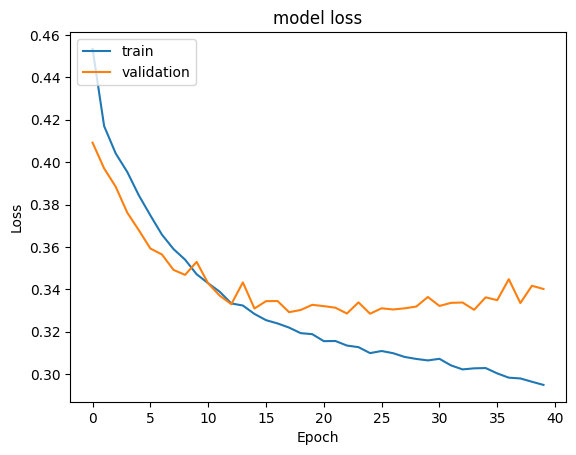

In [66]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

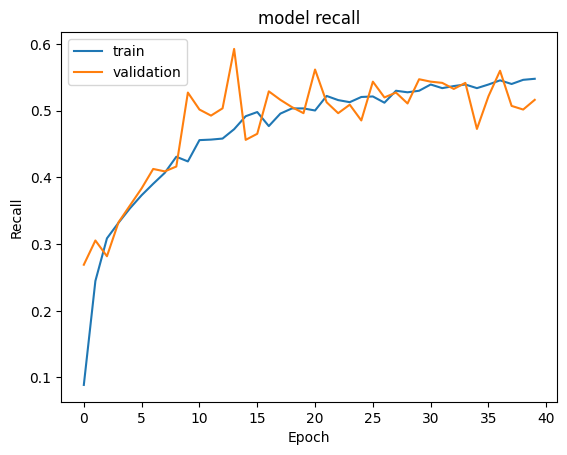

In [67]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [69]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [70]:
model_name = "NN with Adam"

In [71]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5017
           1       0.82      0.54      0.65      1283

    accuracy                           0.88      6300
   macro avg       0.85      0.75      0.79      6300
weighted avg       0.88      0.88      0.87      6300



In [72]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2150
           1       0.73      0.52      0.60       550

    accuracy                           0.86      2700
   macro avg       0.81      0.73      0.76      2700
weighted avg       0.85      0.86      0.85      2700



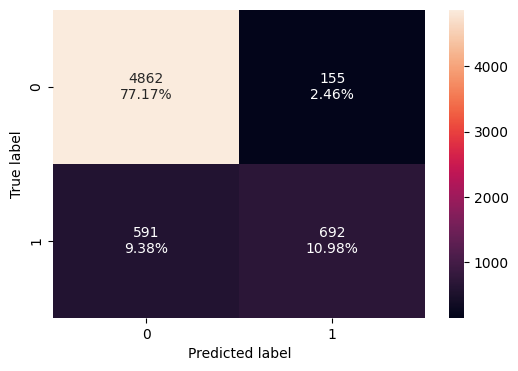

In [73]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

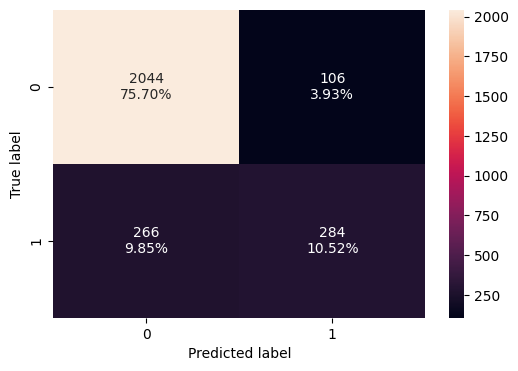

In [74]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

#### Observations

- The performance of this model and required resources are much better on this model.  That being said it's still not good as the recall is only .47 so it's identifying only half of the people who will exit.  This model seems to be overfitting the data as we are getting much better training performance than validation.  Dropout would likely help with this issue.

### Neural Network with Adam Optimizer and Dropout

In [75]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [76]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [77]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [78]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [79]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

In [80]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=50, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/50
197/197 [==============================] - 5s 7ms/step - loss: 0.4946 - recall: 7.7942e-04 - val_loss: 0.4451 - val_recall: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 1s 6ms/step - loss: 0.4545 - recall: 0.0000e+00 - val_loss: 0.4274 - val_recall: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 1s 5ms/step - loss: 0.4473 - recall: 0.0039 - val_loss: 0.4239 - val_recall: 0.0036
Epoch 4/50
197/197 [==============================] - 1s 6ms/step - loss: 0.4393 - recall: 0.0265 - val_loss: 0.4183 - val_recall: 0.0164
Epoch 5/50
197/197 [==============================] - 1s 6ms/step - loss: 0.4376 - recall: 0.0639 - val_loss: 0.4151 - val_recall: 0.1455
Epoch 6/50
197/197 [==============================] - 1s 5ms/step - loss: 0.4344 - recall: 0.1208 - val_loss: 0.4085 - val_recall: 0.2418
Epoch 7/50
197/197 [==============================] - 1s 5ms/step - loss: 0.4329 - recall: 0.1800 - val_loss: 0.4107 - val_recall: 0.3273
Epoch 8/50
197/197

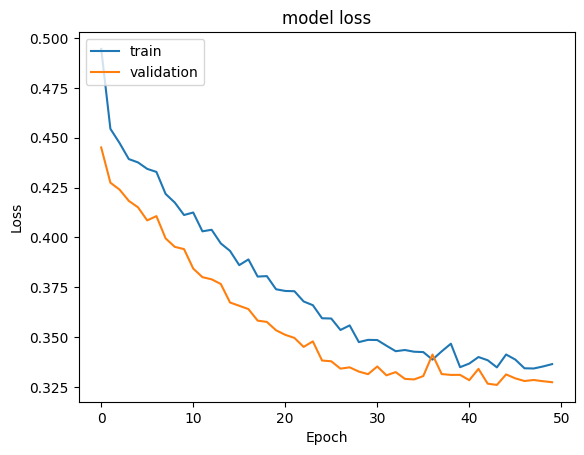

In [81]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

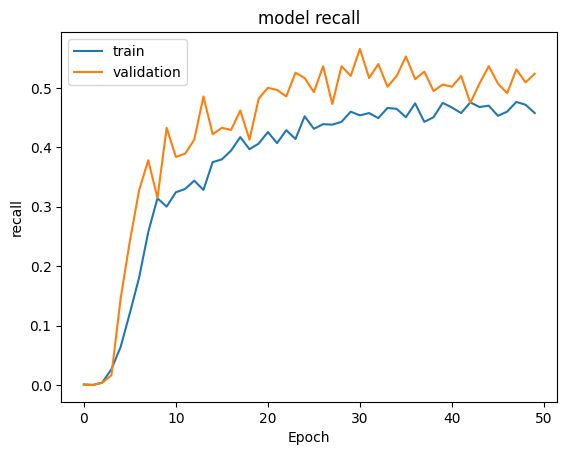

In [82]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [83]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [84]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [85]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [86]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5017
           1       0.80      0.52      0.63      1283

    accuracy                           0.88      6300
   macro avg       0.85      0.74      0.78      6300
weighted avg       0.87      0.88      0.87      6300



In [87]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2150
           1       0.77      0.52      0.62       550

    accuracy                           0.87      2700
   macro avg       0.83      0.74      0.77      2700
weighted avg       0.86      0.87      0.86      2700



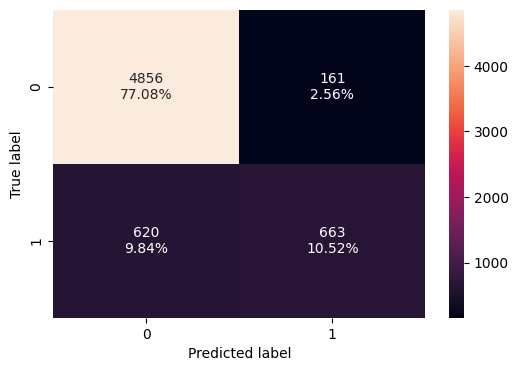

In [88]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

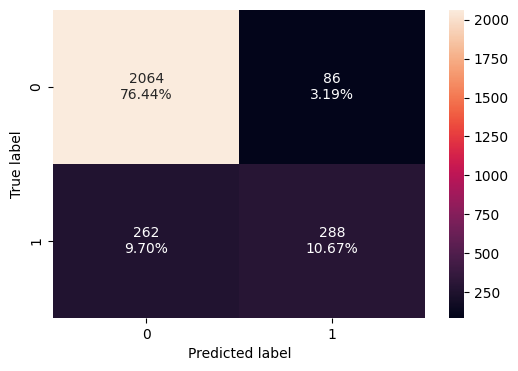

In [89]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

#### Observations

- Overfitting seems to be greatly reduced on this model as can be seen in the performance curves of each Epoch being much closer together for both validation and training data.  The overall performance is still not very good.  This is likely due to the impalance in training data.  SMOTE would be beneficial to balance the data out.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [90]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10034, 11)
After UpSampling, the shape of train_y: (10034,) 



In [91]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [92]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'relu'))

In [93]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [94]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [95]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=40, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/40
314/314 [==============================] - 4s 5ms/step - loss: 0.7808 - recall: 0.1503 - val_loss: 0.6663 - val_recall: 0.3636
Epoch 2/40
314/314 [==============================] - 2s 6ms/step - loss: 0.7062 - recall: 0.3729 - val_loss: 0.6624 - val_recall: 0.4782
Epoch 3/40
314/314 [==============================] - 2s 7ms/step - loss: 0.6872 - recall: 0.4559 - val_loss: 0.6508 - val_recall: 0.5436
Epoch 4/40
314/314 [==============================] - 2s 5ms/step - loss: 0.6812 - recall: 0.4307 - val_loss: 0.5510 - val_recall: 0.1109
Epoch 5/40
314/314 [==============================] - 2s 5ms/step - loss: 0.6654 - recall: 0.3777 - val_loss: 0.6186 - val_recall: 0.6218
Epoch 6/40
314/314 [==============================] - 2s 5ms/step - loss: 0.6386 - recall: 0.6468 - val_loss: 0.6170 - val_recall: 0.7127
Epoch 7/40
314/314 [==============================] - 1s 4ms/step - loss: 0.6304 - recall: 0.7128 - val_loss: 0.6078 - val_recall: 0.7218
Epoch 8/40
314/314 [==============

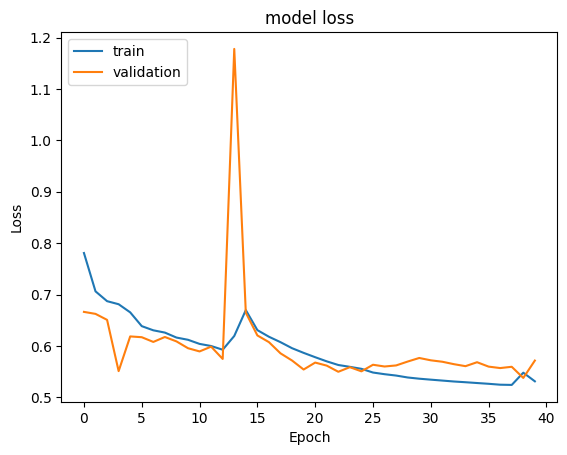

In [97]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

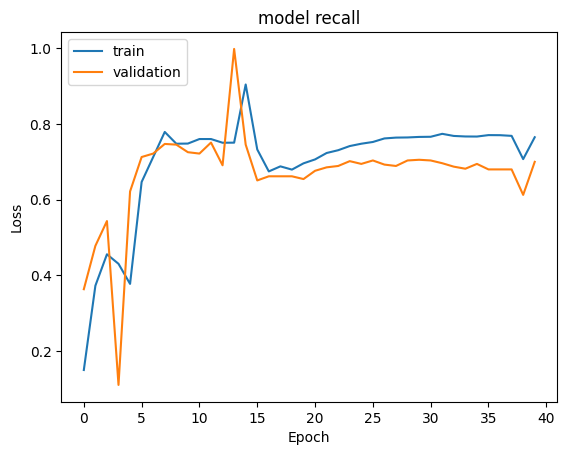

In [98]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [99]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [100]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [101]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [102]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      5017
           1       0.73      0.79      0.76      5017

    accuracy                           0.75     10034
   macro avg       0.75      0.75      0.75     10034
weighted avg       0.75      0.75      0.75     10034



In [103]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2150
           1       0.39      0.70      0.50       550

    accuracy                           0.71      2700
   macro avg       0.65      0.71      0.65      2700
weighted avg       0.80      0.71      0.74      2700



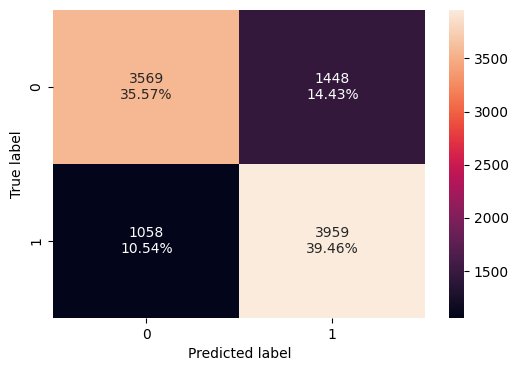

In [104]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

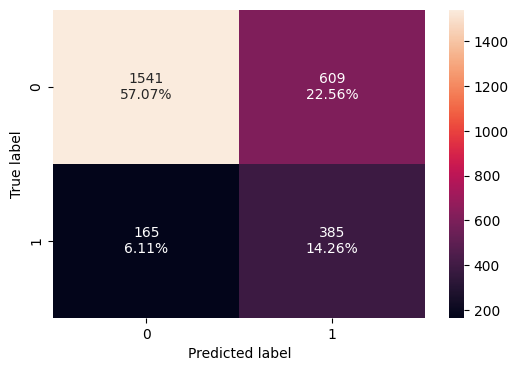

In [105]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

#### Observations

- Recall has increased greatly after applying SMOTE now increasing Recall to .69.  This is a drastic improvement from previous networks.  There still appears to be a bit of overfitting and a not so smooth curve.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [106]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [107]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'relu'))

In [108]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [110]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [111]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size= 32, ## Complete the code to specify the batch size to use
    epochs=40,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/40
314/314 [==============================] - 3s 5ms/step - loss: 0.6859 - recall: 0.4421 - val_loss: 0.5801 - val_recall: 0.6855
Epoch 2/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5754 - recall: 0.6612 - val_loss: 0.5653 - val_recall: 0.6891
Epoch 3/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5411 - recall: 0.7084 - val_loss: 0.5022 - val_recall: 0.5164
Epoch 4/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5278 - recall: 0.7188 - val_loss: 0.5200 - val_recall: 0.7000
Epoch 5/40
314/314 [==============================] - 2s 7ms/step - loss: 0.5065 - recall: 0.7616 - val_loss: 0.4845 - val_recall: 0.6709
Epoch 6/40
314/314 [==============================] - 2s 7ms/step - loss: 0.4895 - recall: 0.7843 - val_loss: 0.5280 - val_recall: 0.7655
Epoch 7/40
314/314 [==============================] - 1s 4ms/step - loss: 0.4835 - recall: 0.7706 - val_loss: 0.4826 - val_recall: 0.7164
Epoch 8/40
314/314 [==============

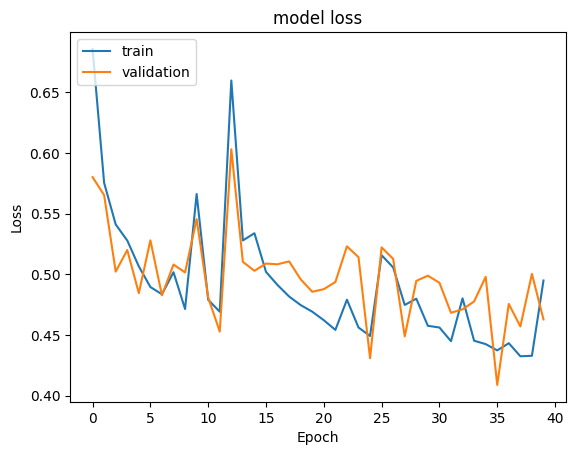

In [113]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

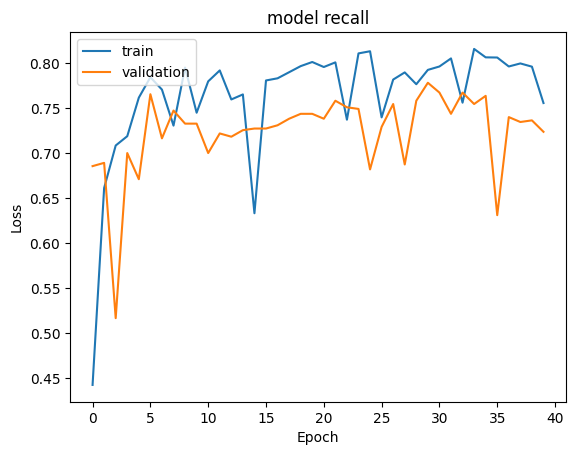

In [114]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [115]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [116]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [117]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [118]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      5017
           1       0.79      0.75      0.77      5017

    accuracy                           0.78     10034
   macro avg       0.78      0.78      0.78     10034
weighted avg       0.78      0.78      0.78     10034



In [119]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2150
           1       0.48      0.72      0.58       550

    accuracy                           0.78      2700
   macro avg       0.70      0.76      0.72      2700
weighted avg       0.83      0.78      0.80      2700



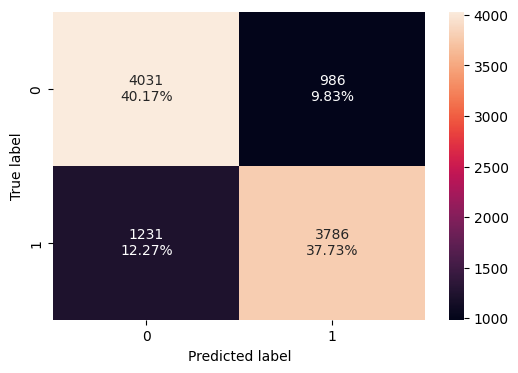

In [120]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

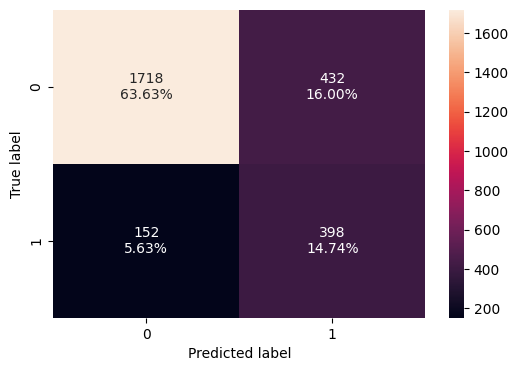

In [121]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

#### Observations

- Implementing Adam Optimizer the recall has once again increased beyond using the SGD optimizer.  However, their still seems to be overfitting and a bit of a sporadic curve.  

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [122]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [123]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [124]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [125]:
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [126]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [127]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=40, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/40
314/314 [==============================] - 3s 5ms/step - loss: 0.6275 - recall: 0.6761 - val_loss: 0.5198 - val_recall: 0.6564
Epoch 2/40
314/314 [==============================] - 1s 4ms/step - loss: 0.5702 - recall: 0.7293 - val_loss: 0.5227 - val_recall: 0.6709
Epoch 3/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5532 - recall: 0.7429 - val_loss: 0.5255 - val_recall: 0.6727
Epoch 4/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5449 - recall: 0.7467 - val_loss: 0.5173 - val_recall: 0.6618
Epoch 5/40
314/314 [==============================] - 2s 5ms/step - loss: 0.5340 - recall: 0.7540 - val_loss: 0.5101 - val_recall: 0.6673
Epoch 6/40
314/314 [==============================] - 2s 6ms/step - loss: 0.5218 - recall: 0.7594 - val_loss: 0.5095 - val_recall: 0.6782
Epoch 7/40
314/314 [==============================] - 2s 7ms/step - loss: 0.5125 - recall: 0.7584 - val_loss: 0.4895 - val_recall: 0.6655
Epoch 8/40
314/314 [==============

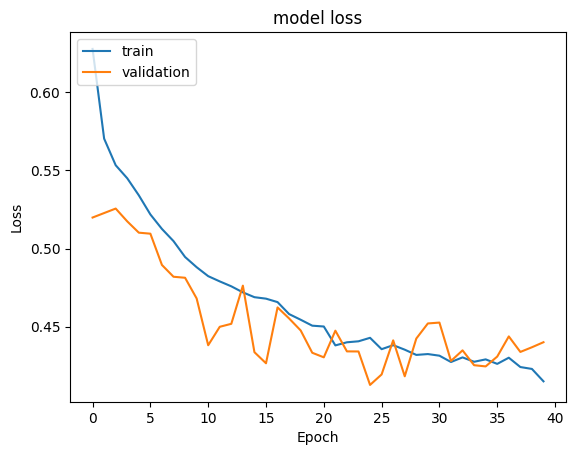

In [128]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

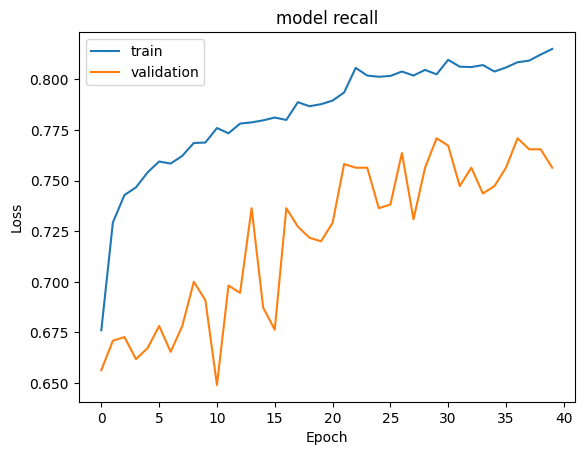

In [129]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [130]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [131]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [132]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [133]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5017
           1       0.82      0.85      0.83      5017

    accuracy                           0.83     10034
   macro avg       0.83      0.83      0.83     10034
weighted avg       0.83      0.83      0.83     10034



In [134]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2150
           1       0.50      0.76      0.60       550

    accuracy                           0.79      2700
   macro avg       0.71      0.78      0.73      2700
weighted avg       0.84      0.79      0.81      2700



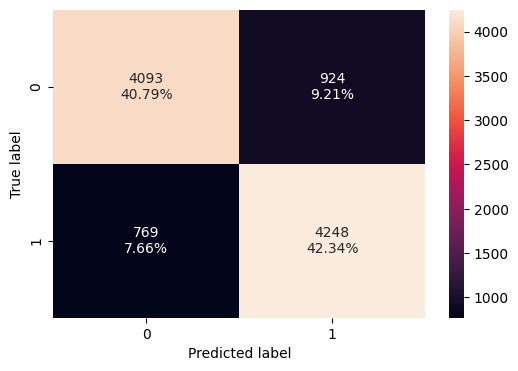

In [135]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

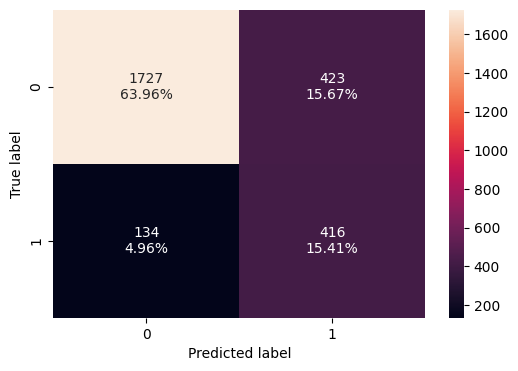

In [136]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

#### Observations

- Applying dropout has reduced some of the model from overfitting and resulted in an increased recall.  That being said it still appears to have some overfitting.  Their may be some future model improvements that can be done.

## Model Performance Comparison and Final Model Selection

In [137]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.201091
NN with Adam & Dropout,0.516758
NN with SMOTE & SGD,0.789117
NN with SMOTE & Adam,0.754634
"NN with SMOTE,Adam & Dropout",0.846721


In [138]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.240000
NN with Adam & Dropout,0.523636
NN with SMOTE & SGD,0.700000
NN with SMOTE & Adam,0.723636
"NN with SMOTE,Adam & Dropout",0.756364


In [139]:
train_metric_df - valid_metric_df

,recall
NN with SGD,-0.038909
NN with Adam & Dropout,-0.006879
NN with SMOTE & SGD,0.089117
NN with SMOTE & Adam,0.030998
"NN with SMOTE,Adam & Dropout",0.090358


In [140]:
y_test_pred = model_5.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

32/32 [==============================] - 0s 3ms/step
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [

In [141]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       796
           1       0.45      0.66      0.53       204

    accuracy                           0.76      1000
   macro avg       0.67      0.72      0.69      1000
weighted avg       0.81      0.76      0.78      1000



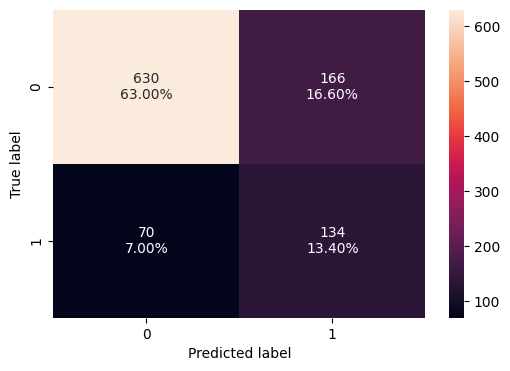

In [142]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

From our analysis we have shown that the following features are likely the most critical to predicting if a customer will exit from the company:

- Balance
- Age
- IsActiveMember
- Gender
- Geography
- Number of Products

However, none of these features have strong enough impact on their own to predict churn on their own.  Using a Neural Network with SMOTE to balance the data, Adam Optimizer, and Dropout.  We can create a model that can correctly identifying 75% of the customers who will exit the company.  This model can be utilized to contact customers who are likely to exit and determine ways to keep them as customers.



<font size=6 color='blue'>Power Ahead</font>

> Add blockquote


___